In [2]:
from pathlib import Path
import sys
pwd = str(Path("..").absolute())
sys.path.insert(0, pwd)

from Pyrser import pyrser
from Node import Node, FileNode, FncNode
from Utils.PyrserHelpers import xfs, dfs_generator
import graphviz; from graphviz import Digraph

In [6]:
file = "/home/kemri/Projects/pyrser/test_files/example.py"
output = pyrser(file)

In [7]:
# delete crap from output we don't want in graph
output.children.keys()

dict_keys(['Person', 'test_it_out'])

In [8]:
output

FileNode(name='example.py', scope=[1, 16], location=/home/kemri/Projects/pyrser/test_files/example.py)
 |-- ClsNode(name='Person', scope=[1, 11])
 |    |-- FncNode(name='is_yoda', scope=[7, 11], calls=[])
 |-- FncNode(name='test_it_out', scope=[14, 16], calls=['is_yoda'])

#### The rules
- if a node has children, create a subgraph with label=node_name
- for every node with a parent, add that node to the parent's subgraph
- if a node calls another node, create a directional edge from one to the other

For test2.py, traversing the Node tree, it would mean:
1. Hit FileNode: no parent && has children -> create subgraph
1. Hit FileNode.FncNode(test): has parent && no children -> add node to subgraph
1. Hit FileNode.FncNode(test2): has parent && has children -> create subgraph
1. Hit FileNode.FncNode(test2).FncNode(test2_1): has parent && no children -> add node to subgraph
1. no more nodes, return

In [9]:
def create_node(node: Node, graph: graphviz.dot.Digraph = None) -> graphviz.dot.Digraph:
    if graph is None:
        graph = Digraph(comment=node.name)
        
    if node.children:
        with graph.subgraph(name="cluster_"+node.name) as sg:
            for child in node.children:
                child_node = node.children[child]
                create_node(child_node, sg)
            sg.attr(label=node.name)
    else:
        graph.node(node.name, shape="box")
    
    return graph

In [10]:
def add_edges(node: Node, graph: graphviz.dot.Digraph) -> None:
    for n in dfs_generator(node):
        if type(n) != FncNode:
            continue
        
        if calls := n.calls:
            for call in calls:
                frm = n.name
                to = call.name
                graph.edge(frm, to)

In [11]:
test = create_node(output)

In [12]:
type(test)

graphviz.dot.Digraph

In [13]:
add_edges(output, test)

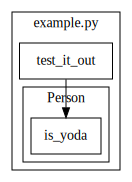

In [14]:
test

In [15]:
test.render("example", format="png")

'example.png'